<a href="https://colab.research.google.com/github/Araujopri/Araujopri/blob/main/Furto_carro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid', {"axes.grid" : False})
sns.set_context('notebook')
np.random.seed(42)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
baseDados = pd.read_csv('dataset_furto_treino.csv')
baseDados.columns

Index(['ID', 'DiaSemana', 'Hora', 'Bairro', 'ProximidadeEstaçãoPolícia',
       'ProximidadeBares', 'VolumeTráfego', 'Iluminação', 'CâmerasSegurança',
       'PopulaçãoLocal', 'TaxaDesemprego', 'FurtoVeiculo'],
      dtype='object')

In [4]:
import pandas as pd

# Supondo que você já tenha um DataFrame chamado 'baseDados' com as colunas mencionadas

# Transforme 'DiaSemana' em dummy variables
baseDados = pd.get_dummies (baseDados, columns=['DiaSemana'], prefix='Dia', drop_first=True)

# Transforme 'Bairro' em dummy variables
baseDados = pd.get_dummies(baseDados, columns=['Bairro'], prefix='Bairro', drop_first=True)

# Transforme 'VolumeTráfego' em dummy variables
baseDados = pd.get_dummies(baseDados, columns=['VolumeTráfego'], prefix='Volume', drop_first=True)

# Transforme 'Iluminação' em dummy variables
baseDados = pd.get_dummies(baseDados, columns=['Iluminação'], prefix='Iluminação', drop_first=True)


In [5]:
baseDados.head()

,ID,Hora,ProximidadeEstaçãoPolícia,ProximidadeBares,CâmerasSegurança,PopulaçãoLocal,TaxaDesemprego,FurtoVeiculo,Dia_Quarta-feira,Dia_Quinta-feira,...,Dia_Sábado,Dia_Terça-feira,Bairro_Subúrbio,Bairro_Zona Norte,Bairro_Zona Oeste,Bairro_Zona Sul,Volume_Baixo,Volume_Médio,Iluminação_Baixo,Iluminação_Médio
0,4228,21,3.87,5,1,4873,12.8,1,False,False,...,False,False,True,False,False,False,False,True,False,True
1,4677,2,7.41,4,1,2331,15.3,1,False,False,...,True,False,False,False,False,False,False,True,False,True
2,801,23,7.02,3,3,1004,19.2,0,False,False,...,False,False,False,True,False,False,True,False,False,True
3,3672,9,6.22,6,0,2720,6.5,1,False,False,...,False,True,False,True,False,False,True,False,False,False
4,4194,9,0.18,4,1,2199,12.3,1,False,False,...,False,False,False,False,False,True,False,True,False,False


In [6]:
cols = list(baseDados.columns)
cols.remove("ID")
cols.remove("FurtoVeiculo")

cols

['Hora',
 'ProximidadeEstaçãoPolícia',
 'ProximidadeBares',
 'CâmerasSegurança',
 'PopulaçãoLocal',
 'TaxaDesemprego',
 'Dia_Quarta-feira',
 'Dia_Quinta-feira',
 'Dia_Segunda-feira',
 'Dia_Sexta-feira',
 'Dia_Sábado',
 'Dia_Terça-feira',
 'Bairro_Subúrbio',
 'Bairro_Zona Norte',
 'Bairro_Zona Oeste',
 'Bairro_Zona Sul',
 'Volume_Baixo',
 'Volume_Médio',
 'Iluminação_Baixo',
 'Iluminação_Médio']

In [7]:
baseDados.shape

(4000, 22)

In [8]:
baseDados.describe()

,ID,Hora,ProximidadeEstaçãoPolícia,ProximidadeBares,CâmerasSegurança,PopulaçãoLocal,TaxaDesemprego,FurtoVeiculo
count,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.000000,4000.000000
mean,2508.711000,11.860750,5.036970,5.03275,2.020000,2795.605000,11.419650,0.909250
std,1435.558218,6.898823,2.879274,2.23415,1.406447,1286.094653,4.905238,0.287289
min,1.000000,0.000000,0.100000,0.00000,0.000000,500.000000,3.000000,0.000000
25%,1276.750000,6.000000,2.520000,3.00000,1.000000,1694.000000,7.200000,1.000000
50%,2500.500000,12.000000,4.970000,5.00000,2.000000,2839.000000,11.300000,1.000000
75%,3758.250000,18.000000,7.600000,6.00000,3.000000,3887.000000,15.600000,1.000000
max,5000.000000,23.000000,10.000000,15.00000,8.000000,4999.000000,20.000000,1.000000


In [9]:
n_linhas = baseDados.shape[0]
print(f"A base de dados possui {n_linhas} linhas.")

target = "FurtoVeiculo"
proporcao = baseDados[target].value_counts(normalize=True)
print(f" Temos {proporcao[1]*100}% de probabilidade de furto de carro, equivalente a {proporcao[1] * n_linhas} linhas")
print(f" Temos {proporcao[0]*100}% de probabilidade de furto de carro, equivalente a {proporcao[0] * n_linhas} linhas")

A base de dados possui 4000 linhas.
 Temos 90.925% de probabilidade de furto de carro, equivalente a 3637.0 linhas
 Temos 9.075% de probabilidade de furto de carro, equivalente a 363.0 linhas


In [10]:
correlation_matrix = baseDados.corr()

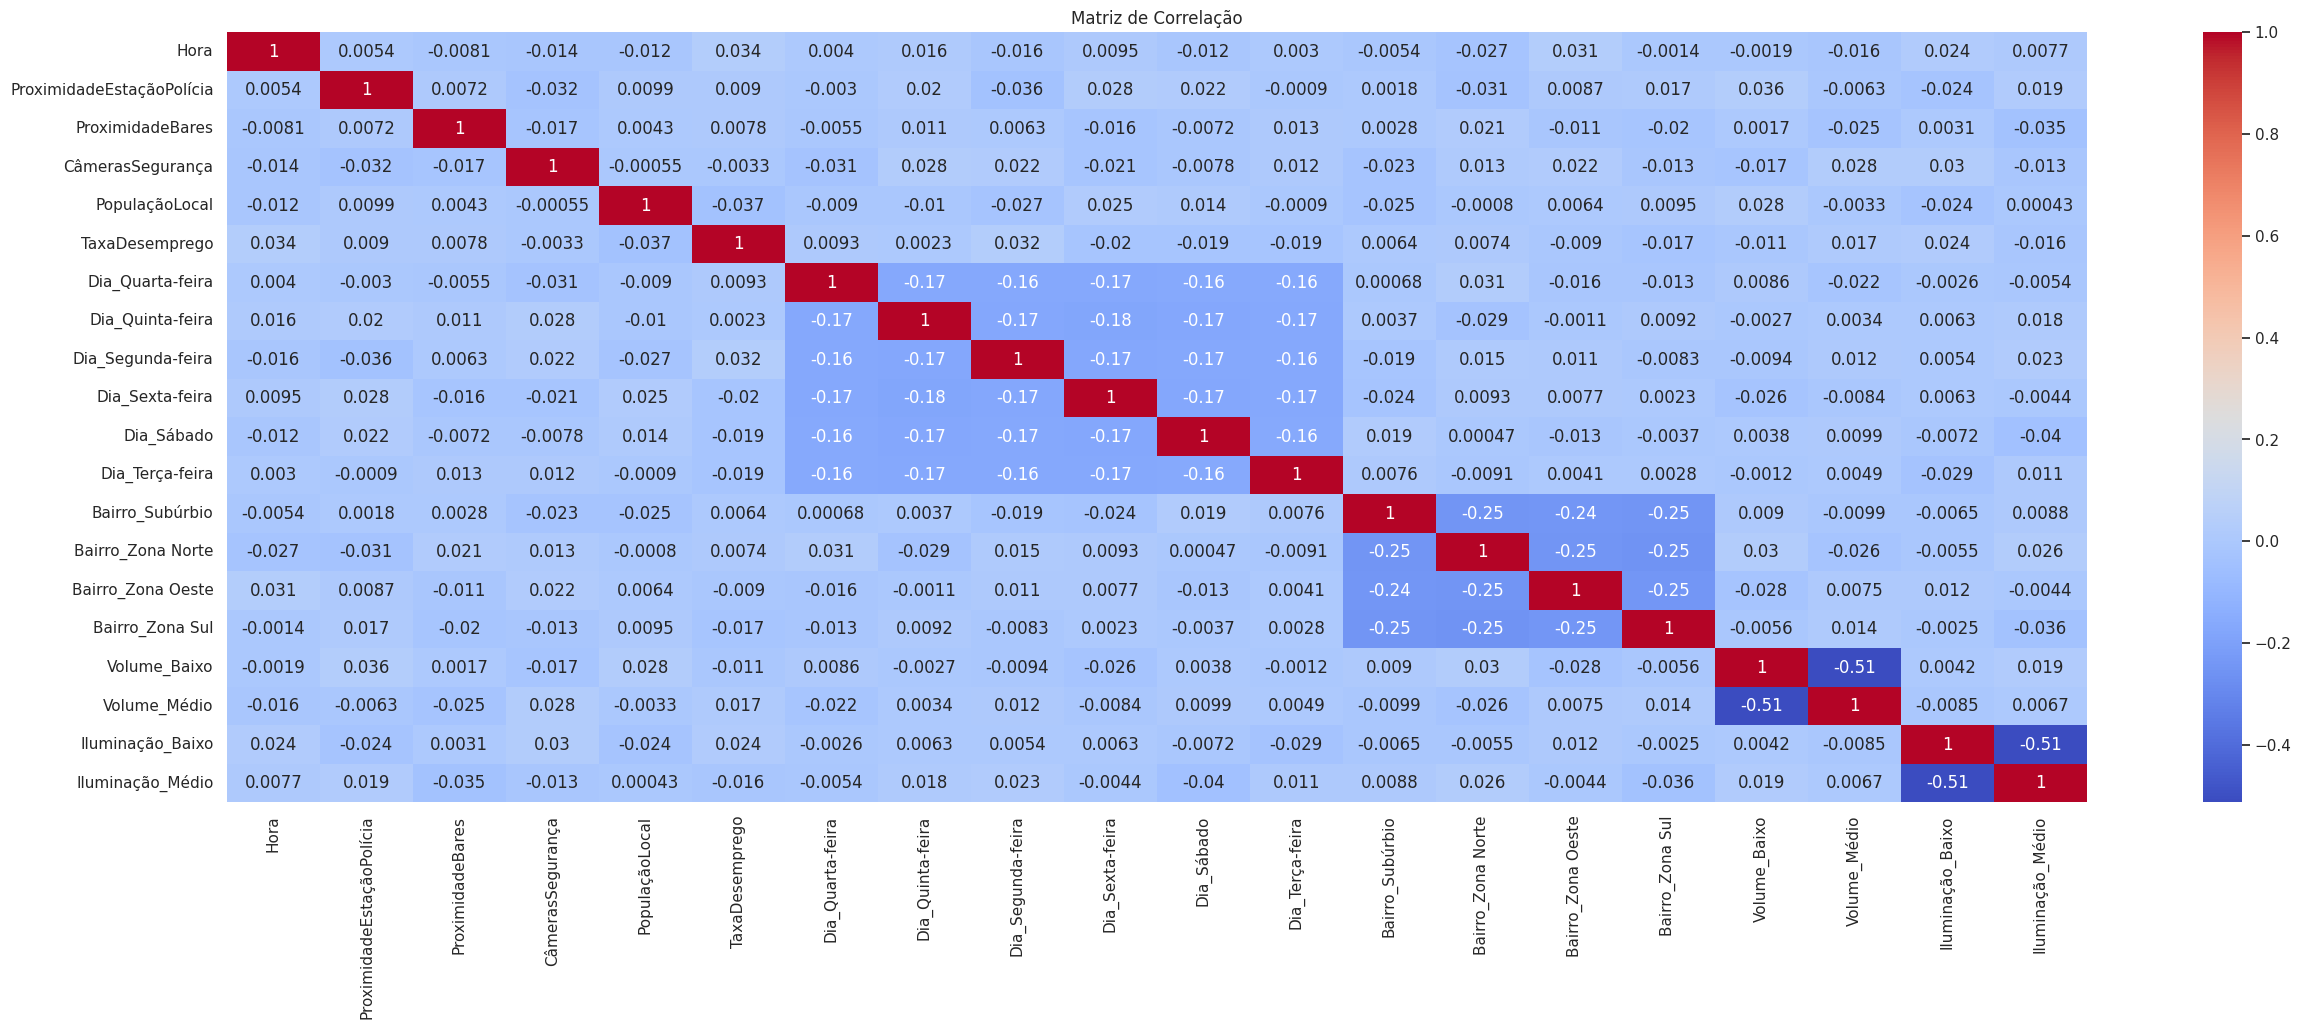

In [11]:
correlation_matrix = baseDados.drop(columns=['ID', 'FurtoVeiculo']).corr()

plt.figure(figsize=(30,10))
chart = sns.heatmap(correlation_matrix, annot=True, cmap = 'coolwarm')
chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
plt.title("Matriz de Correlação")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Remova a variável "ID"
X = baseDados.drop(columns=['ID', 'FurtoVeiculo'])
y = baseDados['FurtoVeiculo']

# Crie um modelo de floresta aleatória
modelo = RandomForestClassifier()

# Treine o modelo
modelo.fit(X, y)

# Obtenha a importância das características
importancias = modelo.feature_importances_

# Crie um DataFrame para visualizar a importância das características
importancias_df = pd.DataFrame({'Variavel': X.columns, 'Importancia': importancias})

# Ordene as variáveis por importância
importancias_df = importancias_df.sort_values(by='Importancia', ascending=False)

# Selecione as melhores 4 variáveis
melhores_variaveis = importancias_df.head(4)

print(melhores_variaveis)




                    Variavel  Importancia
4             PopulaçãoLocal     0.137131
5             TaxaDesemprego     0.127508
1  ProximidadeEstaçãoPolícia     0.125055
0                       Hora     0.101088


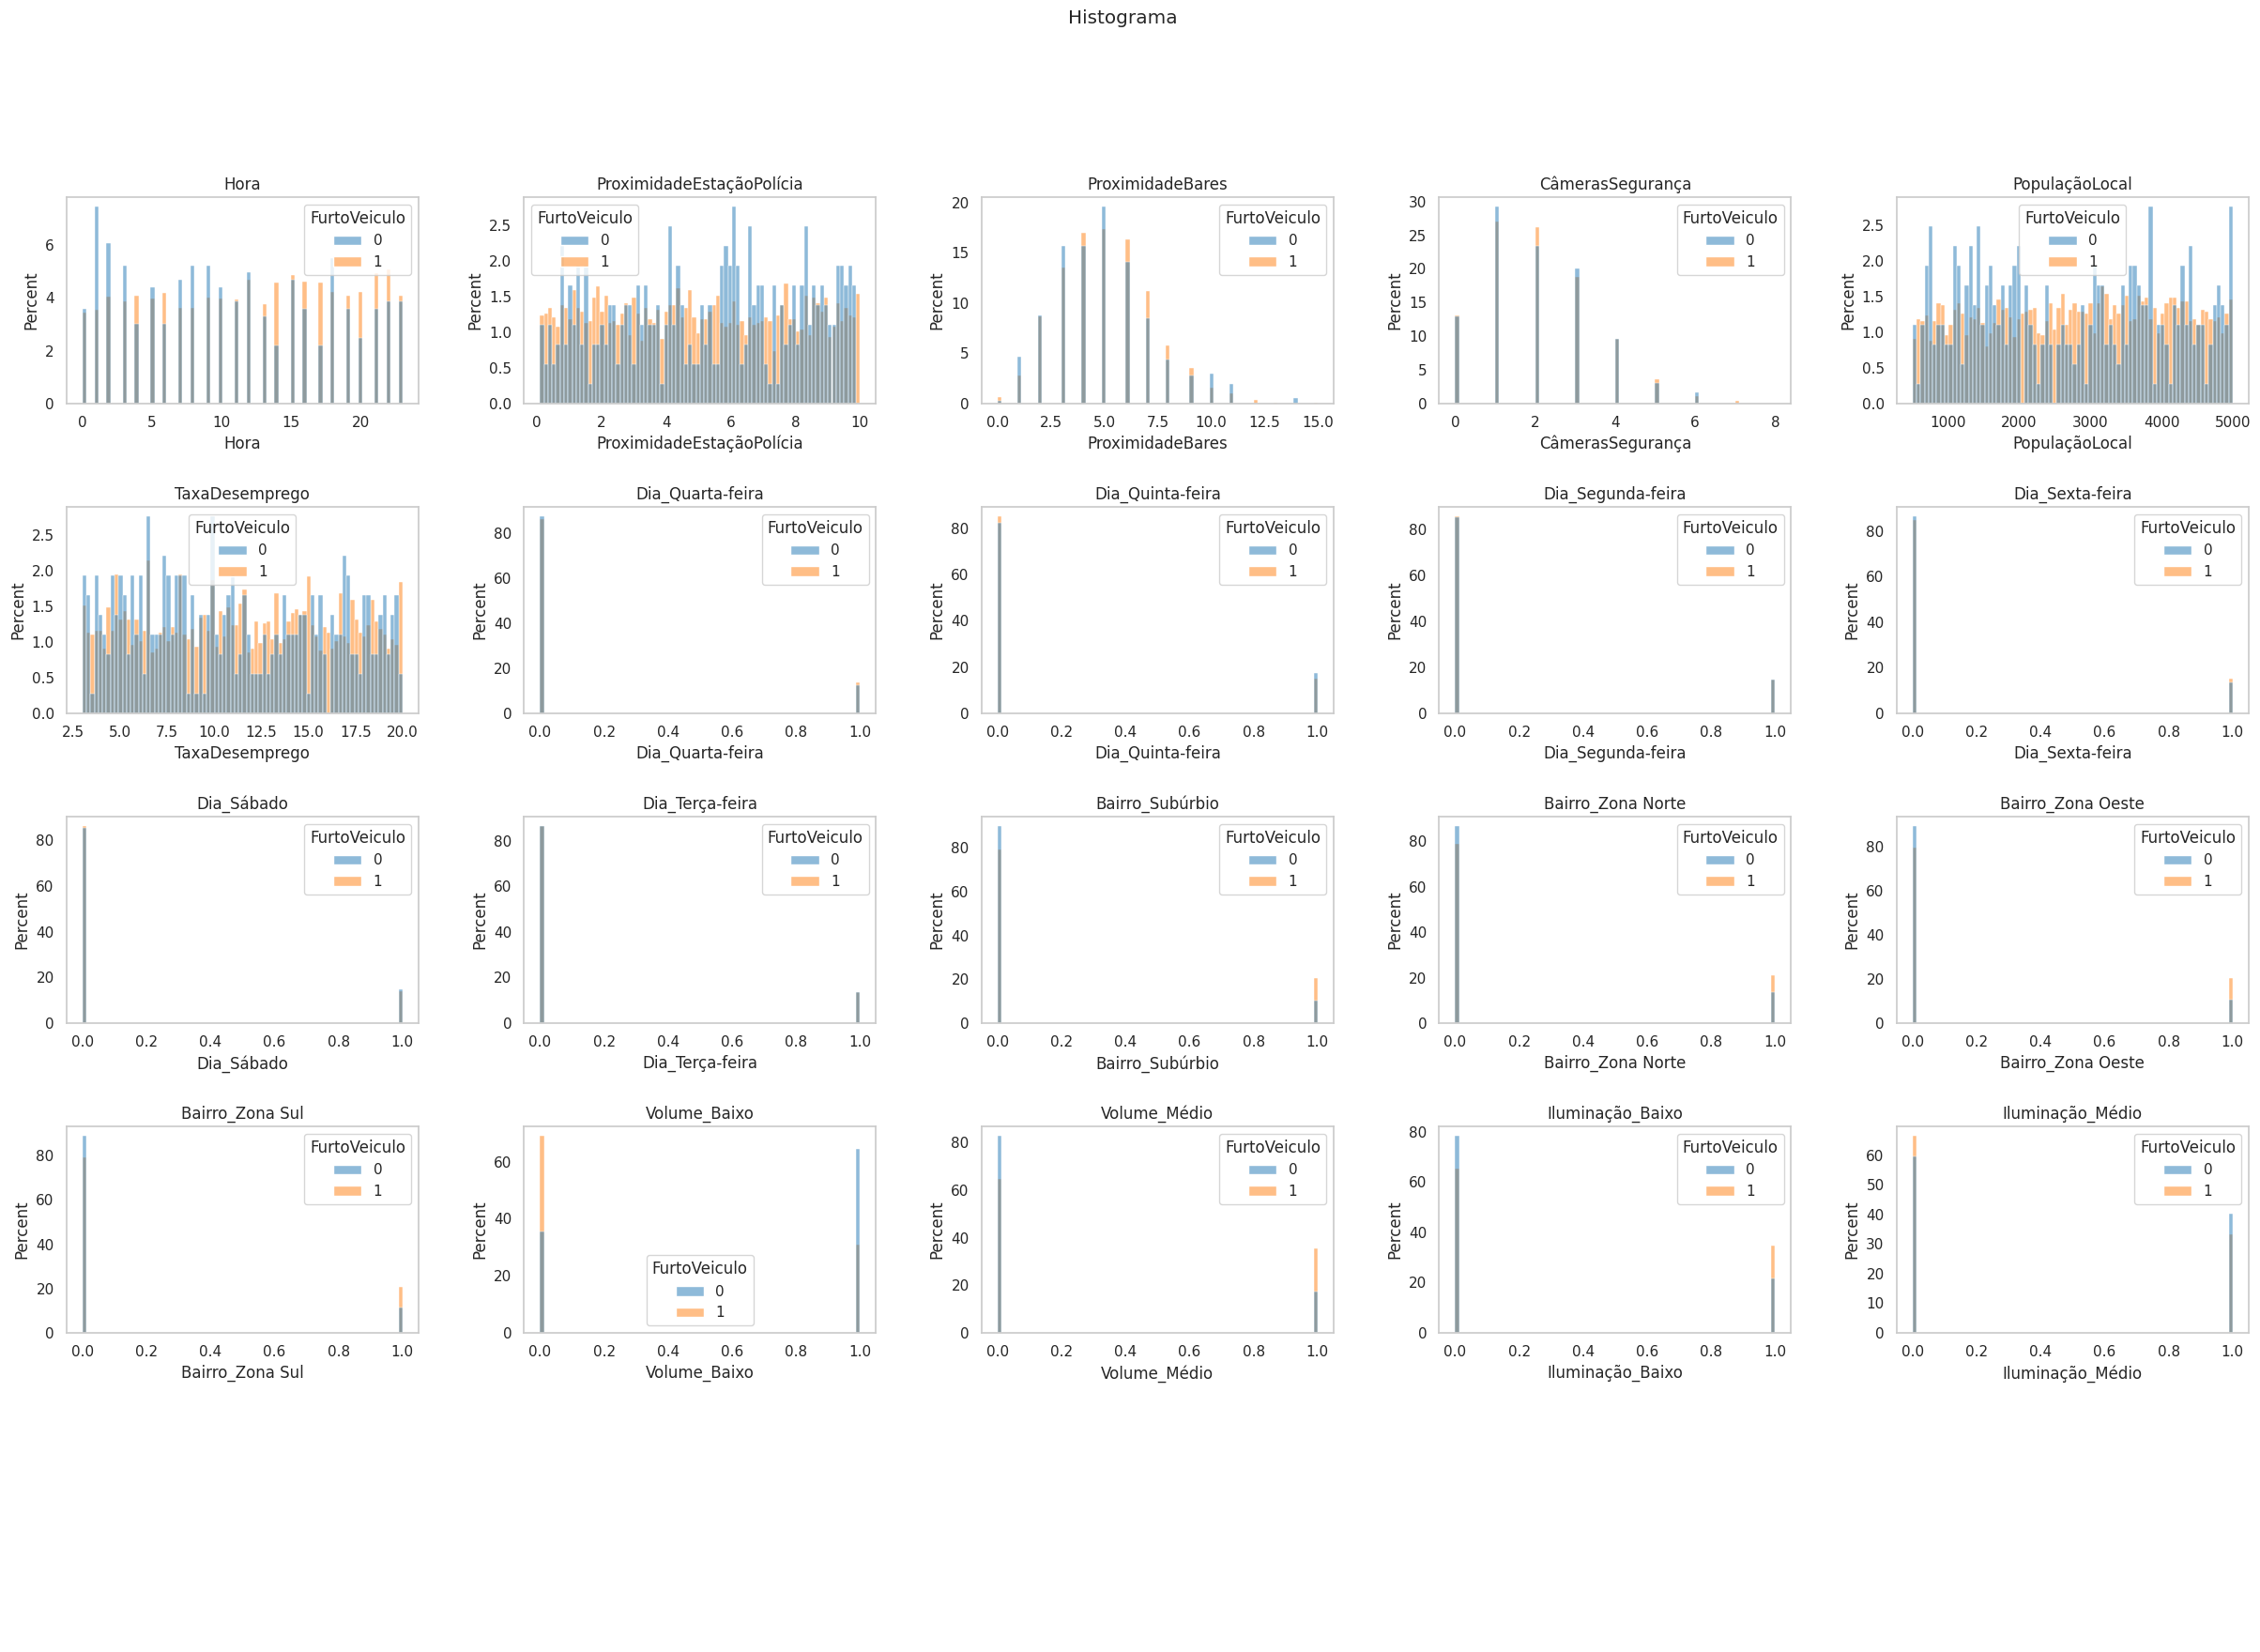

In [13]:
num_cols = 5
num_rows = 5
total_plots = num_cols * num_rows
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,20))
axes = axes.ravel()

for i, col in enumerate (cols):
  sns.histplot(data=baseDados, x= col, hue = target, bins = 80, stat = "percent", common_norm = False, ax=axes[i])
  axes[i].set_title(f"{col}")

for j in range (len(cols), num_cols*num_cols):
  axes[j].axis("off")

# Ajuste de espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)

plt.suptitle("Histograma")
plt.tight_layout
plt.show()

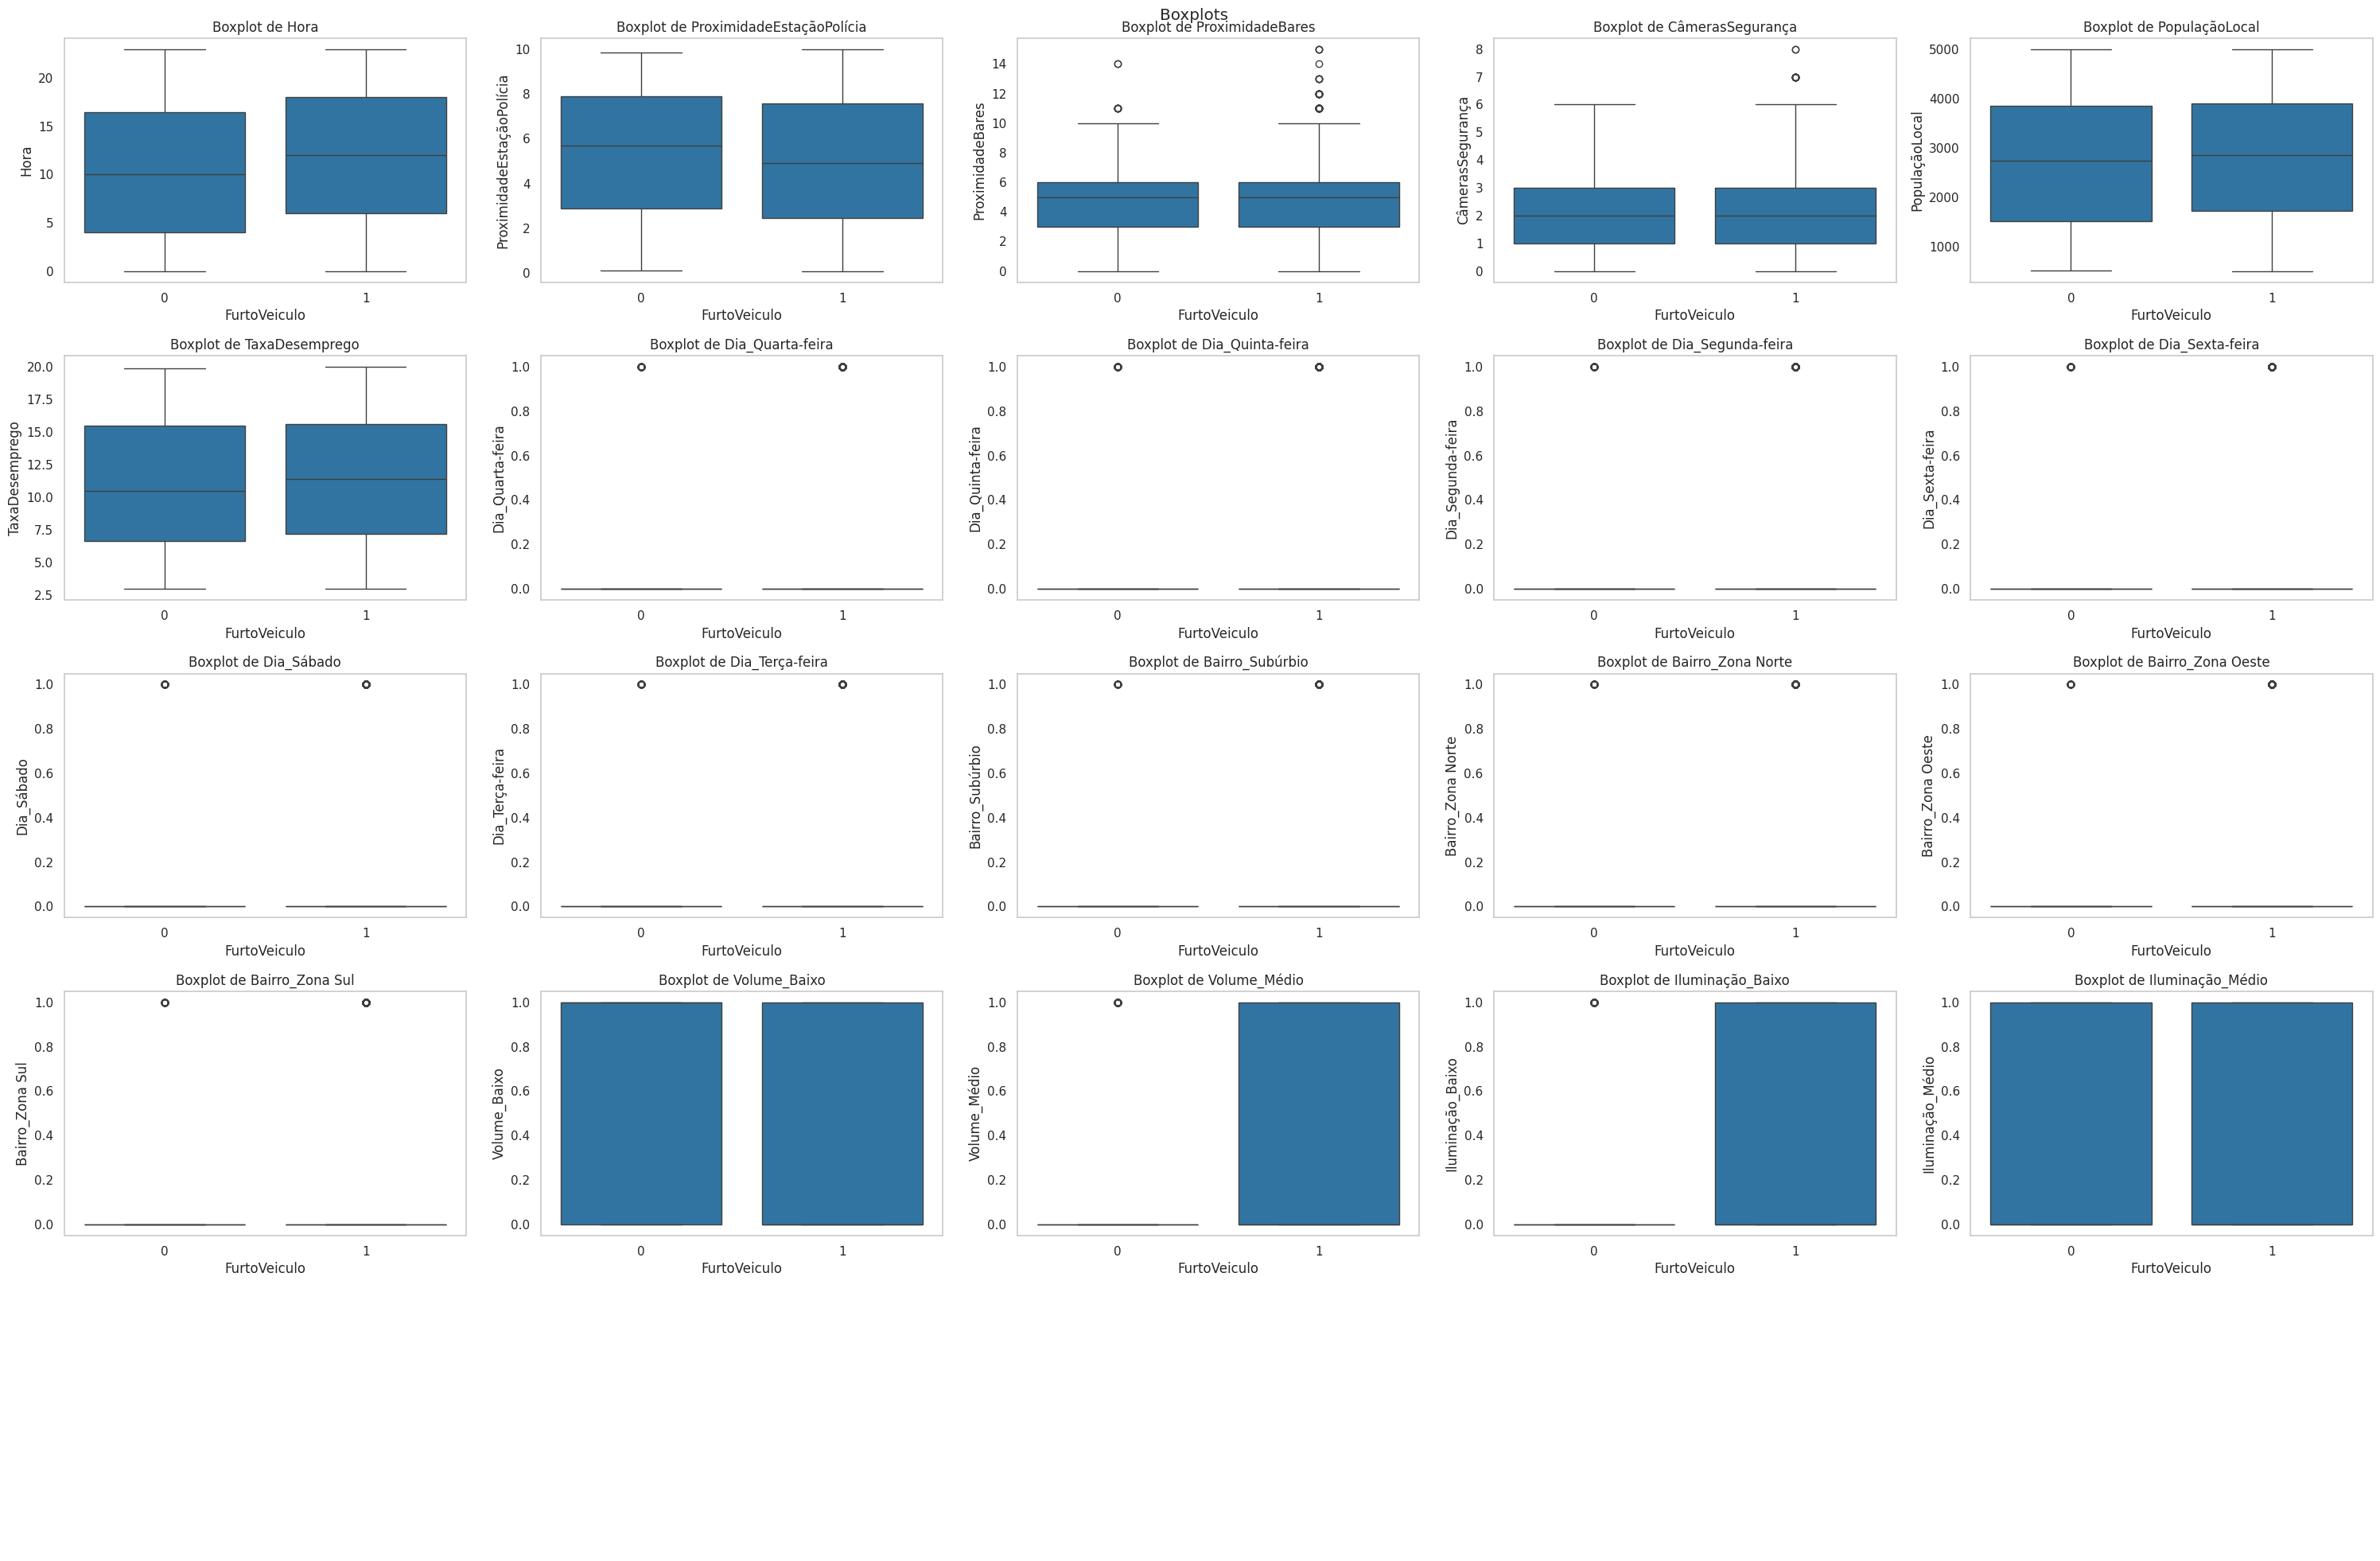

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = 5
num_rows = 5
total_plots = num_cols * num_rows

# Criação dos subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,20))
axes = axes.ravel()

# Plotando os boxplots
for i, col in enumerate(cols):
    sns.boxplot(data=baseDados, x=target, y=col, ax=axes[i])
    axes[i].set_title(f"Boxplot de {col}")

# Desligando os eixos dos gráficos extras
for j in range(len(cols), num_cols*num_rows):
    axes[j].axis("off")

# Ajuste de espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Título principal e exibição
plt.suptitle("Boxplots")
plt.tight_layout()
plt.show()


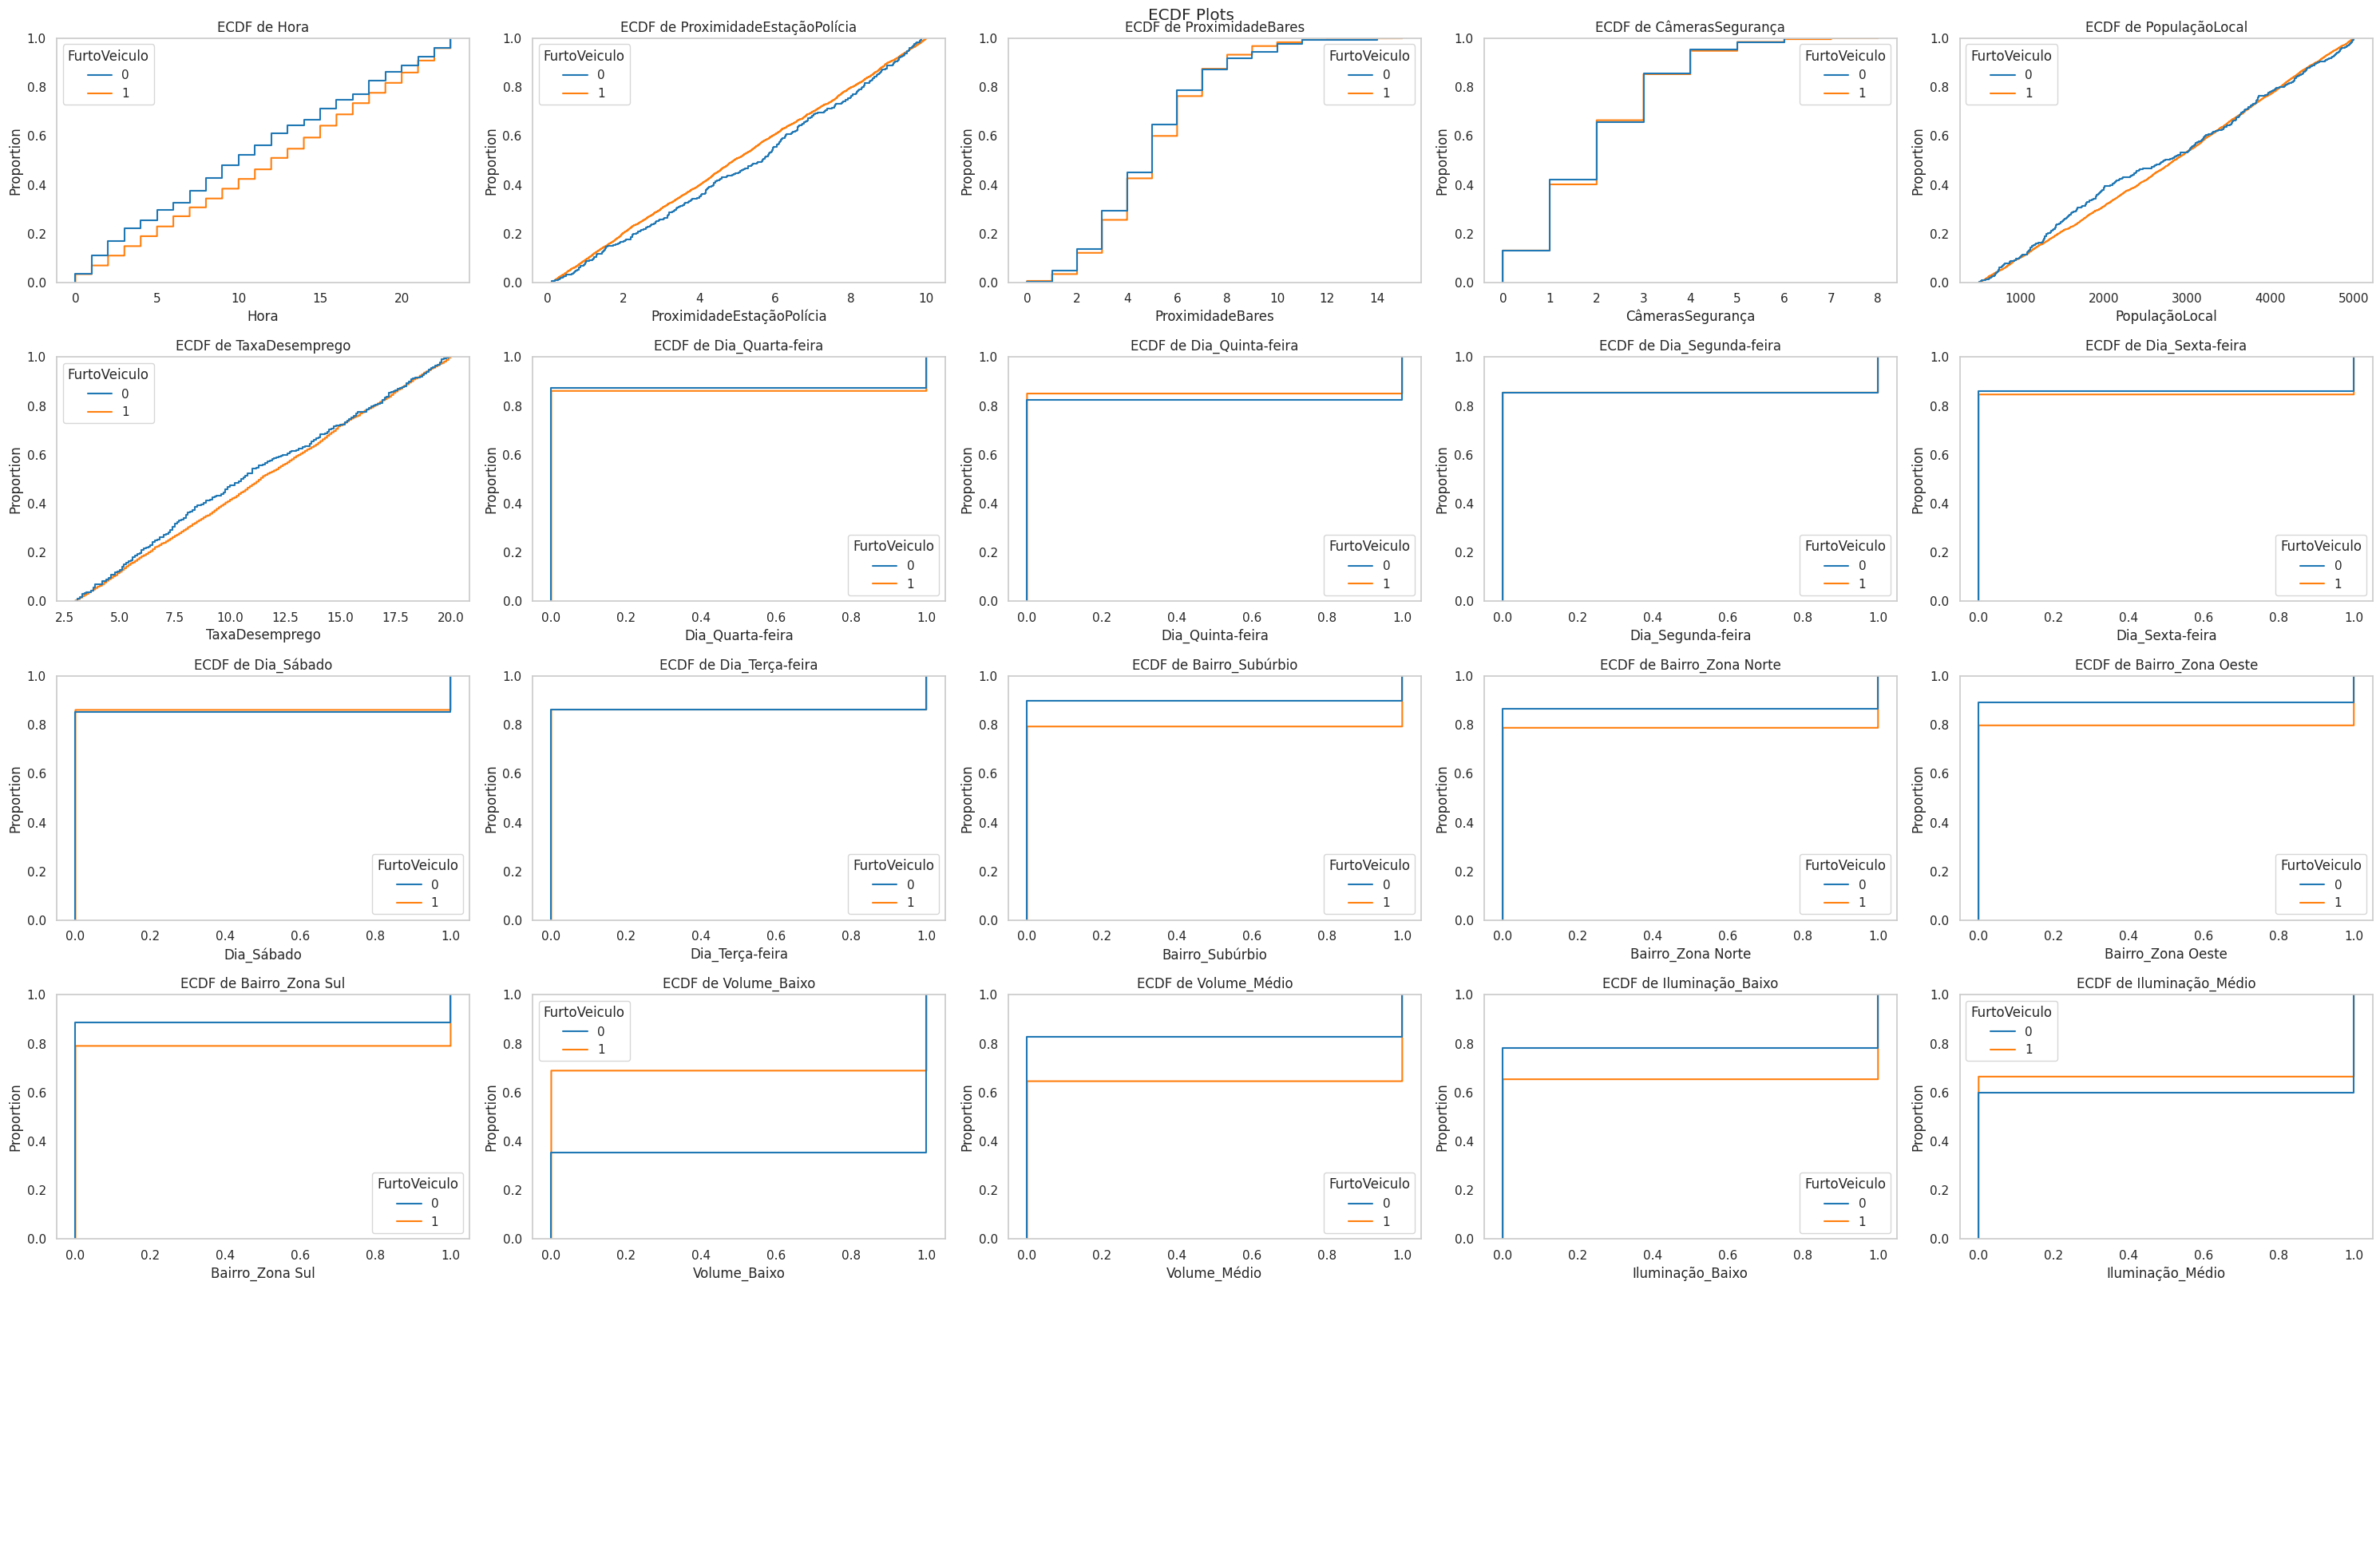

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = 5
num_rows = 5
total_plots = num_cols * num_rows

# Criação dos subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,20))
axes = axes.ravel()

# Plotando os gráficos ECDF
for i, col in enumerate(cols):
    sns.ecdfplot(data=baseDados, x=col, hue=target, ax=axes[i])
    axes[i].set_title(f"ECDF de {col}")

# Desligando os eixos dos gráficos extras
for j in range(len(cols), num_cols*num_rows):
    axes[j].axis("off")

# Ajuste de espaçamento entre os gráficos
plt.subplots_adjust(hspace=0.5, wspace=0.3)

# Título principal e exibição
plt.suptitle("ECDF Plots")
plt.tight_layout()
plt.show()


In [16]:
print(cols)

['Hora', 'ProximidadeEstaçãoPolícia', 'ProximidadeBares', 'CâmerasSegurança', 'PopulaçãoLocal', 'TaxaDesemprego', 'Dia_Quarta-feira', 'Dia_Quinta-feira', 'Dia_Segunda-feira', 'Dia_Sexta-feira', 'Dia_Sábado', 'Dia_Terça-feira', 'Bairro_Subúrbio', 'Bairro_Zona Norte', 'Bairro_Zona Oeste', 'Bairro_Zona Sul', 'Volume_Baixo', 'Volume_Médio', 'Iluminação_Baixo', 'Iluminação_Médio']


In [17]:
models_cols = [ 'Dia_Quarta-feira',
 'Dia_Quinta-feira',
 'Dia_Segunda-feira',
 'Dia_Sexta-feira',
 'Dia_Sábado',
 'Dia_Terça-feira',
 'Bairro_Subúrbio',
 'Bairro_Zona Norte',
 'Bairro_Zona Oeste',
 'Bairro_Zona Sul',
 'Volume_Baixo',
 'Volume_Médio', 'Iluminação_Baixo',
 'Iluminação_Médio']

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score


y = target
X = baseDados[models_cols]
y = baseDados[y]

print(X.shape)
print(y.shape)
# Modelos e parâmetros para a busca em grade
param_grid = {

}

models = {
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
           'n_neighbors': np.arange(1, 40, 2),
           'metric': ['euclidean', 'manhattan', 'minkowski']
        }
    },
    'Logistic Regression': {
        'model': LogisticRegression(),
        'params': {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2'],
            'solver': ['liblinear']
        }
    }

}

best_params = {}

for name, model_info in models.items():
    clf = GridSearchCV(model_info['model'], model_info['params'], cv=5,scoring='f1', return_train_score=False)
    clf.fit(X, y)

    best_params[name] = clf.best_params_

    print(f"Melhor modelo para {name}: {clf.best_params_}")
    print(f"Melhor score de validação cruzada para {name}: {clf.best_score_}")
    print("-" * 40)

# Treine os modelos usando os melhores hiperparâmetros
best_models = {
    'KNNn': KNeighborsClassifier(**best_params['KNN']),
    'Logistic Regression': LogisticRegression(**best_params['Logistic Regression'])
}


(4000, 14)
(4000,)
Melhor modelo para KNN: {'metric': 'euclidean', 'n_neighbors': 9}
Melhor score de validação cruzada para KNN: 0.9664713579142905
----------------------------------------
Melhor modelo para Logistic Regression: {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Melhor score de validação cruzada para Logistic Regression: 0.957168619310184
----------------------------------------


In [19]:
dados_teste = pd.read_csv('dataset_furto_teste.csv')
dados_teste.head()

,ID,DiaSemana,Hora,Bairro,ProximidadeEstaçãoPolícia,ProximidadeBares,VolumeTráfego,Iluminação,CâmerasSegurança,PopulaçãoLocal,TaxaDesemprego
0,1502,Sexta-feira,4,Zona Oeste,9.02,6,Alto,Baixo,0,916,15.0
1,2587,Segunda-feira,9,Zona Norte,2.58,9,Baixo,Baixo,1,1843,6.2
2,2654,Quinta-feira,20,Zona Norte,2.33,5,Alto,Baixo,2,3504,18.4
3,1056,Quinta-feira,12,Zona Norte,8.98,5,Alto,Baixo,2,4317,19.2
4,706,Quinta-feira,15,Zona Sul,7.92,6,Médio,Baixo,1,4066,8.7


In [20]:
# Transforme 'DiaSemana' em dummy variables
dados_teste = pd.get_dummies (dados_teste, columns=['DiaSemana'], prefix='Dia', drop_first=True)

# Transforme 'Bairro' em dummy variables
dados_teste = pd.get_dummies(dados_teste, columns=['Bairro'], prefix='Bairro', drop_first=True)

# Transforme 'VolumeTráfego' em dummy variables
dados_teste = pd.get_dummies(dados_teste, columns=['VolumeTráfego'], prefix='Volume', drop_first=True)

# Transforme 'Iluminação' em dummy variables
dados_teste = pd.get_dummies(dados_teste, columns=['Iluminação'], prefix='Iluminação', drop_first=True)


In [21]:
KNN = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 9)
KNN.fit(X,y)
# Extrair as colunas necessárias para aplicar o modelo
X_teste = dados_teste[models_cols]

# Realizar previsões com o modelo KNN
previsoes = KNN.predict(X_teste)

# Adicionar as previsões como uma coluna 'Target' no DataFrame de teste
dados_teste[target] = previsoes

# Salvar as colunas 'ID' e 'Target' em um arquivo CSV
resultado_csv = dados_teste[['ID', target]]
resultado_csv.rename(columns={target: 'Target'}, inplace=True)
resultado_csv.to_csv('resultado_KNN_furto2.csv', index=False)


In [22]:
rl = LogisticRegression(C= 1, penalty= 'l1', solver= 'liblinear')
rl.fit(X,y)
# Extrair as colunas necessárias para aplicar o modelo
X_teste = dados_teste[models_cols]

# Realizar previsões com o modelo KNN
previsoes = rl.predict(X_teste)

# Adicionar as previsões como uma coluna 'Target' no DataFrame de teste
dados_teste['Target'] = previsoes

# Salvar as colunas 'ID' e 'Target' em um arquivo CSV
resultado_csv = dados_teste[['ID', target]]
resultado_csv.rename(columns={target: 'Target'}, inplace=True)
resultado_csv.to_csv('resultado_rl.csv', index=False)

